## Capstone project
This project is to find a place for opening Medical shop in Mumbai

In [2]:
Medical_catogary = '4bf58dd8d48988d104941735'

Import necessary libraries

In [3]:
import pandas as pd # for data processing
import folium   #for creating maps
import requests  #for retreiving Information from URL
from geopy.geocoders import Nominatim  #converting address to cordinates
from pandas.io.json import json_normalize #converting json to DataFrame 

Foursquare credentials

In [4]:
CLIENT_ID = 'VMZOQS0S5BPRUZRK0IUOOOXTNUGOVIEIEQKTKPCEHTRPWMXG' # replace it with your Client id
CLIENT_SECRET = '2MEUS14WLHXFTPU3CPER0FHBHTEYRG3AZKEYXV52EYN2HQP3' # replace it with your client secret
VERSION = '20180604'

Getting latitude and longitude of mumbai

In [5]:

# reading address from user
address = input("Enter address : ")
geolocator = Nominatim(user_agent="foursquare_agent") #
#converting address to coordinates
location = geolocator.geocode(address)
if(location == None):
    print('Please enter a Valid address')
    exit()
# reading latitude from location
latitude = location.latitude
# reading longitude from location
longitude = location.longitude

Enter address : mumbai


Defining url to get relevent data from oursquare API as json file

In [6]:

radius = 10000

Limit = 300
url  = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&categoryid={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, Limit,'4bf58dd8d48988d104941735')
results = requests.get(url).json()

Getting relevent data from json file

In [7]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4d9b39ed2ae860fc0f5a81cb',
  'name': 'Sofitel Mumbai BKC',
  'location': {'address': 'C 57 Bandra Kurla Complex, Bandra East, Maharashtra',
   'crossStreet': 'Bandra East',
   'lat': 19.0674478,
   'lng': 72.8690057,
   'labeledLatLngs': [{'label': 'display',
     'lat': 19.0674478,
     'lng': 72.8690057}],
   'distance': 1297,
   'postalCode': '400051',
   'cc': 'IN',
   'city': 'Mumbai',
   'state': 'Mahārāshtra',
   'country': 'India',
   'formattedAddress': ['C 57 Bandra Kurla Complex, Bandra East, Maharashtra (Bandra East)',
    'Mumbai 400051',
    'Mahārāshtra',
    'India']},
  'categories': [{'id': '4bf58dd8d48988d1fa931735',
    'name': 'Hotel',
    'pluralName': 'Hotels',
    'shortName': 'Hotel',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
     'suffix': '.png'},
    'primary': T

Cleaning data and converting into data fram

In [8]:
#fetching omly relevant data from categories
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#flatten JSON, Normalize JSON to Dataframe
dataframe = json_normalize(items) 

# filter columns,consider only required columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
medical_institution = dataframe.loc[:, filtered_columns]

# filter the category for each row
medical_institution['venue.categories'] = medical_institution.apply(get_category_type, axis=1)

# clean columns
medical_institution.columns = [col.split('.')[-1] for col in medical_institution.columns]

#replce NaN values with Not found in address
medical_institution['address'] =medical_institution['address'].fillna("Not found")
medical_institution.tail(10)   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
90,Rude Lounge,Lounge,"Supreme Business Park 8th Floor ,B wing",Hiranandani gardens,19.111052,72.908298,"[{'label': 'display', 'lat': 19.11105226299543...",5079,400076,IN,Powai,Mahārāshtra,India,"[Supreme Business Park 8th Floor ,B wing (Hira...",NaN,536b9f1b498e4b46ee9a853b
91,Le Pain Quotidien,Bakery,"Central Avenue, Hiranandani Gardens, 1st Floor...","central avenue,hiranandani gardens",19.118580,72.911624,"[{'label': 'display', 'lat': 19.11857965196816...",5953,400076,IN,Mumbai,Mahārāshtra,India,"[Central Avenue, Hiranandani Gardens, 1st Floo...",NaN,52a3180011d219b98b30e785
92,Gold's Gym,Gym,"Supreme Business Park, Powai",NaN,19.112610,72.910616,"[{'label': 'display', 'lat': 19.11260998178343...",5369,NaN,IN,Mumbai,Mahārāshtra,India,"[Supreme Business Park, Powai, Mumbai, Mahārās...",NaN,4fe309f0c2eecd9a181234c5
93,Mad over Donuts,Donut Shop,8 Central Ave.,Powai,19.115847,72.908805,"[{'label': 'display', 'lat': 19.11584677419096...",5532,400076,IN,Mumbai,Mahārāshtra,India,"[8 Central Ave. (Powai), Mumbai 400076, Mahārā...",NaN,508c274ee4b01ceeb37b966b
94,Sharda Bhavan,Indian Restaurant,"Lakhamsi Nappu Rd., Matunga",NaN,19.026783,72.850841,"[{'label': 'display', 'lat': 19.02678336369018...",6148,400019,IN,Mumbai,Mahārāshtra,India,"[Lakhamsi Nappu Rd., Matunga, Mumbai 400019, M...",NaN,4b87b1f8f964a52084c731e3
95,Natural Icecream Parlour,Ice Cream Shop,"Eden Garden, Powai",NaN,19.115236,72.907107,"[{'label': 'display', 'lat': 19.11523613184671...",5371,400076,IN,Mumbai,Mahārāshtra,India,"[Eden Garden, Powai, Mumbai 400076, Mahārāshtr...",NaN,4bdaf8423904a5933e11489e
96,Aromas Café,Café,Ventura Building,"Central Avenue Rd, Hiranandani Gardens, Powai",19.116941,72.910082,"[{'label': 'display', 'lat': 19.11694098338812...",5710,400076,IN,Mumbai,Mahārāshtra,India,"[Ventura Building (Central Avenue Rd, Hiranand...",NaN,4b507f47f964a520322527e3
97,Mia Cucina,Italian Restaurant,"G3 Transocean, Lake Boulevard Street, Hiranand...",Powai,19.120170,72.907217,"[{'label': 'display', 'lat': 19.12016998507553...",5833,400076,IN,Mumbai,Mahārāshtra,India,"[G3 Transocean, Lake Boulevard Street, Hiranan...",NaN,4fe7292be4b0e1967f08a489
98,Zaffran,Afghan Restaurant,R City Mall,"LBS Marg, Ghatkopar",19.099895,72.916463,"[{'label': 'display', 'lat': 19.09989485254850...",4896,NaN,IN,Mumbai,Mahārāshtra,India,"[R City Mall (LBS Marg, Ghatkopar), Mumbai, Ma...",NaN,50438a77e4b0f300427ef813
99,Home Chef,Restaurant,"69, Meher Building, Line of Sushrusha Hospital","Ranade Road, Shivaji Park, Dadar (West)",19.024239,72.837775,"[{'label': 'display', 'lat': 19.02423884104258...",7110,400028,IN,Mumbai,Mahārāshtra,India,"[69, Meher Building, Line of Sushrusha Hospita...",NaN,4b6fc260f964a520c2fb2ce3


Shape of medical_institution datarame

In [9]:
medical_institution.shape

(100, 16)

Visualisation of langitude and longitude of each medical institution

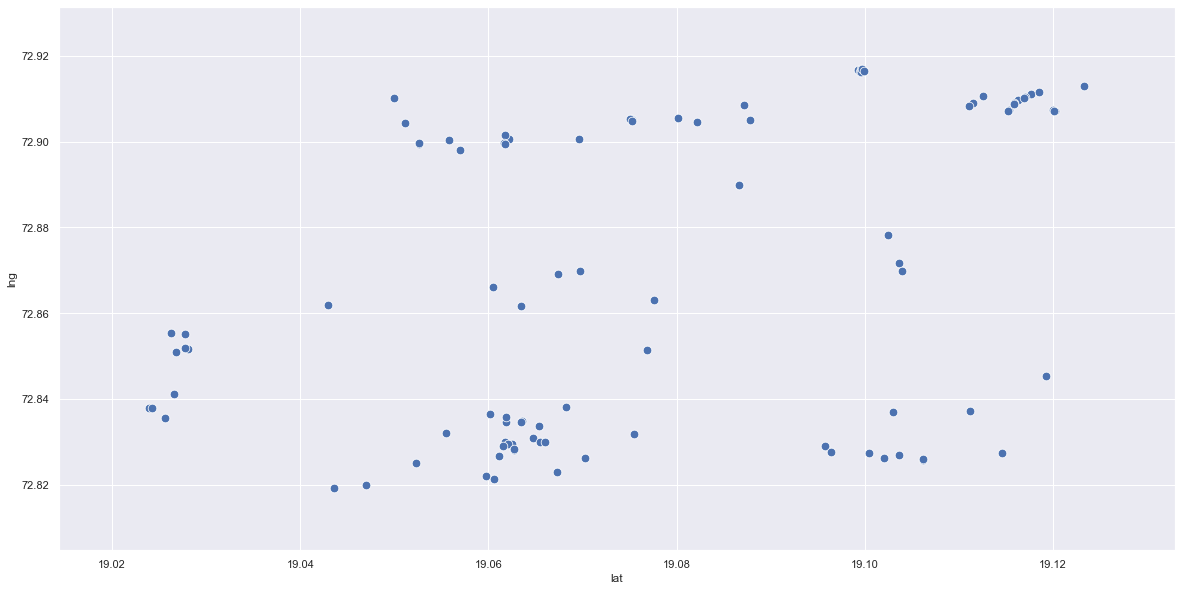

In [50]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(x=medical_institution.lat,y=medical_institution.lng , s=75)

Converting medical institution dataframes latitude and longitude into 2D arry to provide as an input to the clustring algorithm

In [14]:
x1=medical_institution['lat'].values
x2= medical_institution['lng'].values

In [15]:
X= []
for i in range(0,99):
    X.append([x1[i],x2[i]])
X

[[19.0674478, 72.8690057],
 [19.069729972809867, 72.86976115276019],
 [19.08664273439014, 72.88983942558215],
 [19.08665464005278, 72.88978308735972],
 [19.063456936971313, 72.86157639300012],
 [19.07755998111434, 72.8630348274812],
 [19.060442786769624, 72.86602023390516],
 [19.069663288262202, 72.900534957865],
 [19.076832, 72.85127],
 [19.056939655644623, 72.8980563848788],
 [19.075307078374436, 72.90528180465846],
 [19.102502, 72.8782358],
 [19.10368684595821, 72.87161592088513],
 [19.10395400387377, 72.86987902868673],
 [19.042954612559253, 72.86179617563526],
 [19.05260228697018, 72.89939139105024],
 [19.05264319584667, 72.89976042039858],
 [19.075523243262623, 72.8317448378628],
 [19.06219113254999, 72.90053772253209],
 [19.064715341256164, 72.83091998224552],
 [19.061738948824093, 72.90159578992274],
 [19.061917933615774, 72.83447969968148],
 [19.075203729949173, 72.90519239753868],
 [19.080111914515822, 72.90552454958744],
 [19.0601765440514, 72.83644615761388],
 [19.068243423

Using Kmeans clustring finding 6 cluster points where concentration of medical institution is high

In [16]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
kmeans.labels_

kmeans.predict([[0, 0], [12, 3]])

kmeans.cluster_centers_

array([[19.08171906, 72.87091105],
       [19.06180932, 72.82922863],
       [19.06706176, 72.90304881],
       [19.10535132, 72.8305259 ],
       [19.11153864, 72.91144736],
       [19.02842308, 72.849013  ]])

Making dataframe of cluster centre to visulisation in map

In [17]:
cluster_centre=pd.DataFrame(kmeans.cluster_centers_, columns=['lat','lng'])
cluster_centre.index= ['centre 1', 'centre 2', 'centre 3', 'centre 4', 'centre 5', 'centre 6']
cluster_centre

,lat,lng
centre 1,19.081719,72.870911
centre 2,19.061809,72.829229
centre 3,19.067062,72.903049
centre 4,19.105351,72.830526
centre 5,19.111539,72.911447
centre 6,19.028423,72.849013


Visulization of Cluster centres (in red)

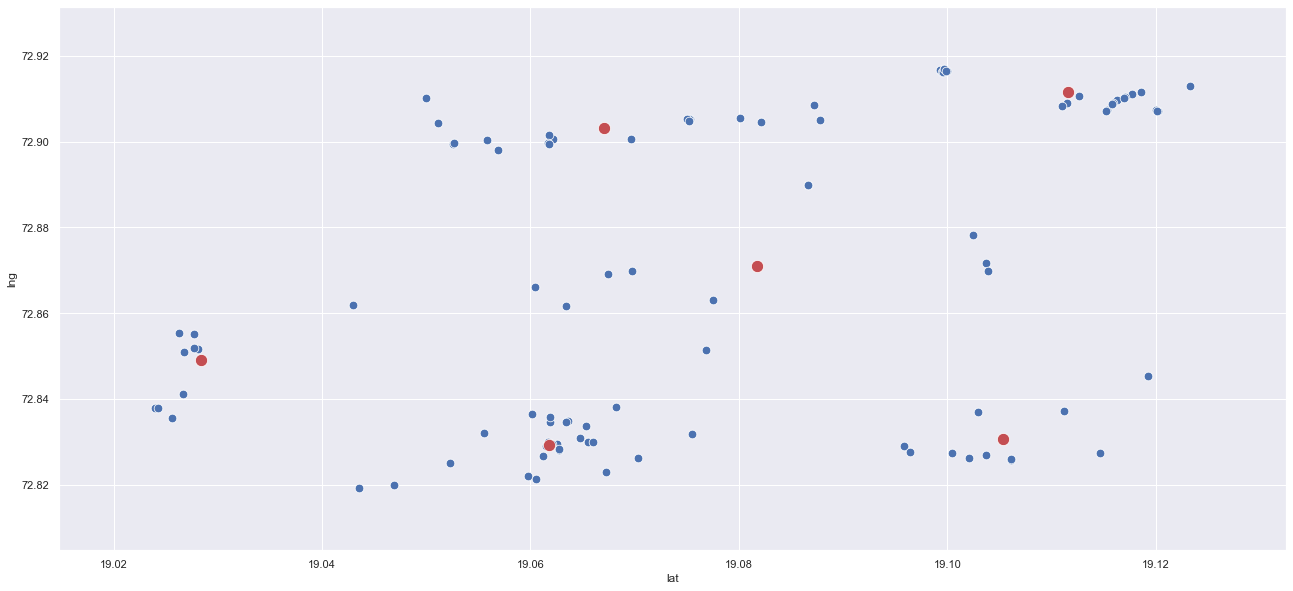

In [19]:
import seaborn as sns
sns.set(rc={'figure.figsize':(22,10)})
sns.scatterplot(x=medical_institution.lat,y=medical_institution.lng,s=75 )
sns.scatterplot(x=cluster_centre.lat, y=cluster_centre.lng, color='r', s=150 )

Getting visulization in Map

In [20]:
latitude= 19.0760
longitude= 72.8777

In [21]:

# creating map zoom at present Location
map = folium.Map(location=[latitude,longitude],zoom_start=13)

# adding the current location to map folium.CircleMarker(location=[latitude,longitude],radius=5,color='red',fill=True,fill_color='red').add_to(map)
folium.Marker(location=[latitude,longitude],popup="<strong> Current Location</strong>",icon = folium.Icon(color='red')).add_to(map)

# drawing radius of search
folium.Circle(location=[latitude,longitude],radius=radius,color='blue',opacity=0.5,fill=True,fill_color='blue').add_to(map)

# adding all the popular places around
for lat,lon,name in zip(medical_institution.lat,medical_institution.lng,medical_institution.name):
  folium.CircleMarker(location=[lat,lon],radius=5,color="yellow",fill=True,fill_color='yellow').add_to(map)
  folium.Marker(location=[lat,lon],
              popup= folium.Popup(('<strong><font color ="red">Name :     </font>'+name+'</strong><br>'
                                   ),max_width=250)).add_to(map)

In [22]:
for lat,lon,name in zip(cluster_centre.lat,cluster_centre.lng, cluster_centre.index):
    folium.CircleMarker(location=[lat,lon], radius=5, color='red', fill= True, fill_color= 'red').add_to(map)
    folium.Marker(location=[lat,lon],
                 popup=folium.Popup(('<strong><font color ="red">Name :     </font>'+name+'</strong><br>'
                                   ),max_width=250)).add_to(map)

In [23]:
map